<a href="https://colab.research.google.com/github/RonVest92/ASSET-PRICING-DL-RNN/blob/main/Copy_of_Ddibya_Ronald_Optimization_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ronald Ddibya


## Mean-Variance Portfolio Optimization Strategy

In [ ]:
import math
import numpy as np
import scipy.stats as scs
from pylab import mpl, plt

In [ ]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_format = 'svg'

<ipython-input-2-6de634db2a83>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Downloading Data for the Strategy

In [ ]:
import pandas as pd
import scipy.stats as scs
from pylab import mpl, plt

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2015-01-01'
end = '2024-04-30'

# Tickers of assets
symbols = ['AAPL','GOOG','AMZN','TSLA','IBM','MSFT','DE']
#symbols = ['AAPL','GOOG','AMZN','TSLA','IBM','MSFT','DE']

# Downloading data
data = yf.download(symbols, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = symbols

[*********************100%%**********************]  7 of 7 completed


In [ ]:
#raw = pd.read_csv('../../data.csv',
raw = data.dropna()

In [ ]:
#data = raw[symbols]
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2346 entries, 2015-01-02 to 2024-04-29
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2346 non-null   float64
 1   GOOG    2346 non-null   float64
 2   AMZN    2346 non-null   float64
 3   TSLA    2346 non-null   float64
 4   IBM     2346 non-null   float64
 5   MSFT    2346 non-null   float64
 6   DE      2346 non-null   float64
dtypes: float64(7)
memory usage: 146.6 KB


In [ ]:
data.tail()

,AAPL,GOOG,AMZN,TSLA,IBM,MSFT,DE
Date,,,,,,,
2024-04-23,16689.9994%,17953.9993%,39720.9991%,15991.9998%,18219.0002%,40757.0007%,14467.9993%
2024-04-24,16902.0004%,17658.9996%,39461.9995%,16110.0006%,18410.0006%,40905.9998%,16213.0005%
2024-04-25,16988.9999%,17366.9998%,39405.9998%,15794.9997%,16891.0004%,39904.0009%,17017.9993%
2024-04-26,16930.0003%,17961.9995%,39332.9987%,17369.0002%,16713.0005%,40632.0007%,16828.9993%
2024-04-29,17350.0000%,18096.0007%,40095.9991%,16789.9994%,16742.9993%,40225.0000%,19405.0003%


<Axes: xlabel='Date'>

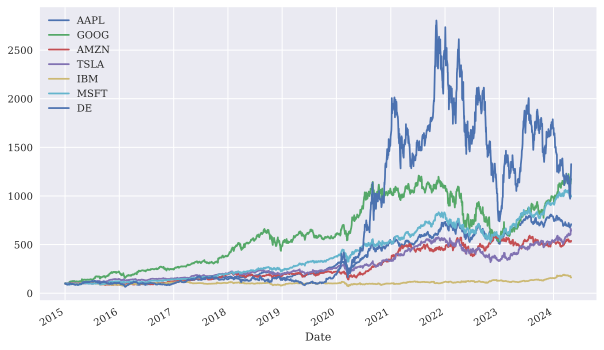

In [ ]:
(data / data.iloc[0] * 100).plot(figsize=(10, 6))


In [ ]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,AAPL,GOOG,AMZN,TSLA,IBM,MSFT,DE
Date,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-2.8576%,-2.0731%,-2.1627%,-2.1066%,-1.5860%,-0.9238%,-4.2950%
2015-01-06,0.0094%,-2.3098%,-0.8363%,-2.3450%,-2.1802%,-1.4786%,0.5648%
2015-01-07,1.3925%,1.0544%,-0.4325%,-0.1715%,-0.6557%,1.2626%,-0.1563%
2015-01-08,3.7703%,0.6813%,1.3151%,0.3148%,2.1502%,2.8994%,-0.1566%


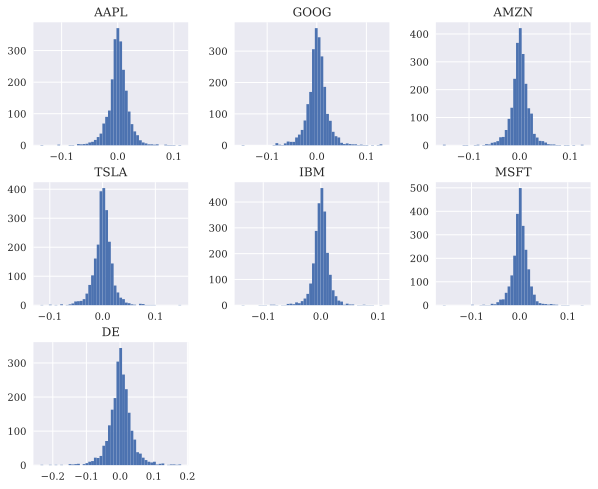

In [ ]:
log_returns.hist(bins=50, figsize=(10, 8));
# plt.savefig('../../images/ch13/stat_08.png');

# Portfolio Optimization

### The Data

In [ ]:
noa = len(symbols)

In [ ]:
data = raw[symbols]

In [ ]:
rets = np.log(data / data.shift(1))

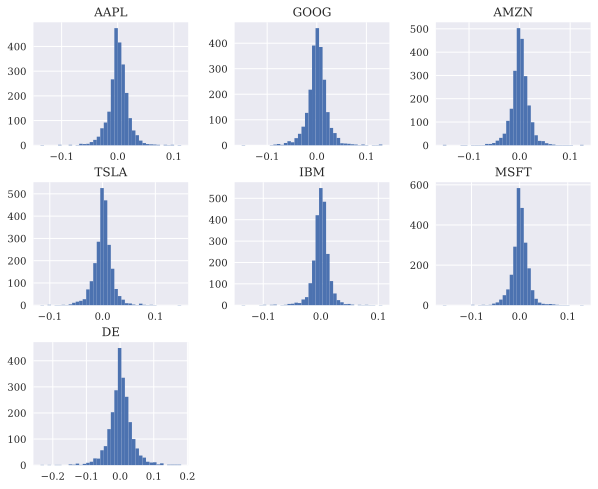

In [ ]:
rets.hist(bins=40, figsize=(10, 8));


### Finding Annualized asset returns

In [ ]:
rets.mean() * 252 # there're 252 days in a year

AAPL   21.0643%
GOOG   26.4597%
AMZN   18.0879%
TSLA   19.9752%
IBM     5.1840%
MSFT   24.7034%
DE     27.7864%
dtype: float64

In [ ]:
rets.cov() * 252

,AAPL,GOOG,AMZN,TSLA,IBM,MSFT,DE
AAPL,8.3084%,5.3802%,3.3746%,5.0865%,2.8660%,5.4984%,7.0382%
GOOG,5.3802%,10.8252%,2.7538%,6.1758%,2.3302%,5.9858%,7.2509%
AMZN,3.3746%,2.7538%,8.9105%,2.9712%,3.1835%,3.1479%,4.2415%
TSLA,5.0865%,6.1758%,2.9712%,8.2094%,2.7269%,5.7085%,5.8869%
IBM,2.8660%,2.3302%,3.1835%,2.7269%,5.8360%,3.0067%,2.7094%
MSFT,5.4984%,5.9858%,3.1479%,5.7085%,3.0067%,7.5939%,6.3591%
DE,7.0382%,7.2509%,4.2415%,5.8869%,2.7094%,6.3591%,31.8270%


## Visualizing the Portfolio Frontier
### Initially I will just plot some portfolios which are randomly (rather than optimally) generated

In [ ]:
# Specify a risk free rate (in this case, the annualized risk-free rate)
rf = 0.0469  # as of Apr 30 2024

In [ ]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [ ]:
weights

array([0.31457633, 0.11095223, 0.00171349, 0.03942709, 0.07874428,
       0.32343889, 0.13114768])

In [ ]:
weights.sum()

1.0

In [ ]:
(np.sum(rets.mean() * weights) * 252).round(4)

0.2242

In [ ]:
variance = np.dot(weights.T, np.dot(rets.cov() * 252, weights))
print("Variance = ")
variance.round(4)

Variance = 


0.0641

In [ ]:
std_dev = math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
std_dev

0.25314663587453395

In [ ]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

In [ ]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [ ]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)

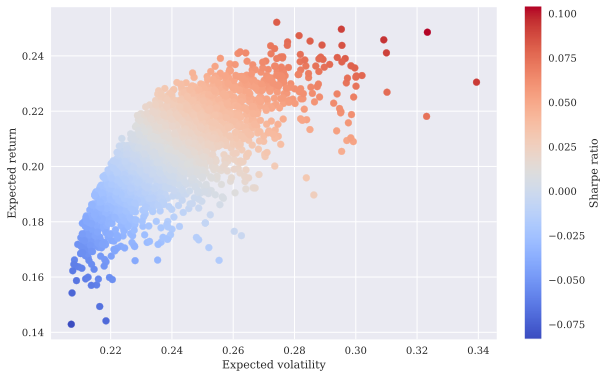

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets - rf / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio');


### Portfolio Optimization

In [ ]:
import scipy.optimize as sco

In [ ]:
#Specifying Risk Free Rate as of Apr 30 2024
rf = 0.0469

# Identifying the portfolio with the maximum Sharpe Ratio
## Note: This will involve minimizing the negative of the Sharpe Ratio.  This is the same as maximizing the Sharpe Ratio

In [ ]:
def min_func_sharpe(weights):
    return -(port_ret(weights)-rf) / port_vol(weights)

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [ ]:
bnds = tuple((0, 1) for x in range(noa))

In [ ]:
eweights = np.array(noa * [1. / noa,])
eweights

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [ ]:
min_func_sharpe(eweights)


-0.6734661318957196

In [ ]:
opts = sco.minimize(min_func_sharpe, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)

In [ ]:
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.7880664577405944
       x: [ 1.297e-17  2.835e-01  1.907e-01  5.811e-17  0.000e+00
            4.867e-01  3.913e-02]
     nit: 7
     jac: [-1.891e-01 -1.907e-01 -1.909e-01 -1.180e-01  1.592e-01
           -1.909e-01 -1.907e-01]
    nfev: 56
    njev: 7

### Examining the maximum Sharpe ratio portfolio composition

In [ ]:
print("Maximum Sharpe Ratio Portfolio:")
opts['x'].round(4)

Maximum Sharpe Ratio Portfolio:


array([0.    , 0.2835, 0.1907, 0.    , 0.    , 0.4867, 0.0391])

In [ ]:
port_ret(opts['x']).round(4)

0.2406

In [ ]:
port_vol(opts['x']).round(4)

0.2458

In [ ]:
Max_Sharpe_Ratio = -min_func_sharpe(opts['x'])
print("Maximum Sharpe Ratio:" )
Max_Sharpe_Ratio.round(4)

Maximum Sharpe Ratio:


0.7881

### Calculating the minimum variance portfolio's composition

In [ ]:
optv = sco.minimize(port_vol, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)

In [ ]:
optv

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.20439873152379245
       x: [ 1.001e-01  9.067e-02  1.821e-01  1.193e-01  4.406e-01
            6.723e-02  1.518e-18]
     nit: 9
     jac: [ 2.042e-01  2.049e-01  2.044e-01  2.042e-01  2.043e-01
            2.046e-01  2.181e-01]
    nfev: 72
    njev: 9

In [ ]:
### Minimum Variance Portfolio
print("Minimum Variance Portfolio :")
optv['x'].round(4)

Minimum Variance Portfolio :


array([0.1001, 0.0907, 0.1821, 0.1193, 0.4406, 0.0672, 0.    ])

### Note the minimum variance portfolio's composition in the cell above

In [ ]:
print("Expected standard deviation of the minimum variance portfolio:")
port_vol(optv['x']).round(4)

Expected standard deviation of the minimum variance portfolio:


0.2044

In [ ]:
print("Expected return for the minimum variance portfolio:")
port_ret(optv['x']).round(4)

Expected return for the minimum variance portfolio:


0.1413

# Creating the Minimum Variance Frontier:
### Constraints: (1) Portfolio return should equal target return (tret), and (2) Weights add up to 1

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [ ]:
bnds = tuple((0, 1) for x in weights)

In [ ]:
trets = np.linspace(port_ret(optv['x'])-0.05, port_ret(optv['x'])+0.10, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP',
    #                   bounds=bnds, constraints=cons)
                         constraints=cons)

    tvols.append(res['fun'])
tvols = np.array(tvols)

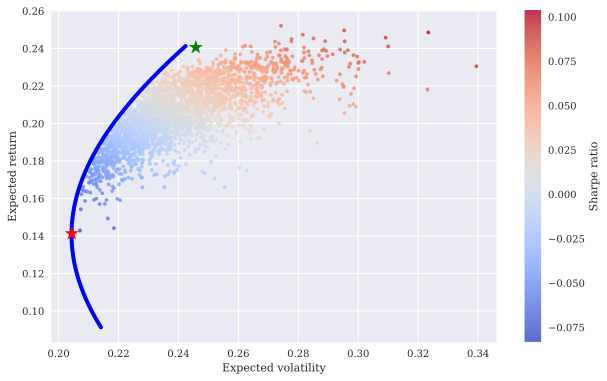

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets-rf / pvols,
            marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),
         'g*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),
         'r*', markersize=15.0)
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio');


### Capital Allocation Line

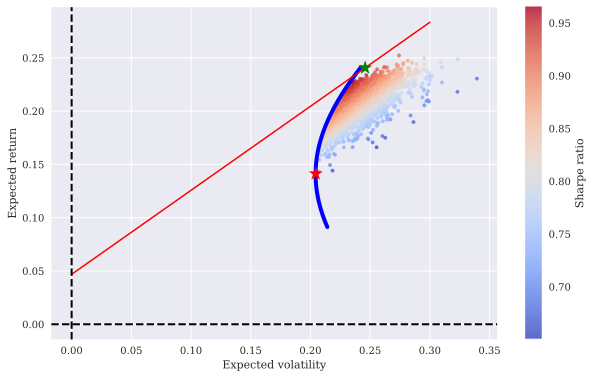

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)

cx = np.linspace(0.0, 0.3)
plt.plot(cx, rf + Max_Sharpe_Ratio * cx, 'r', lw=1.5)

plt.plot(port_vol(opts['x']), port_ret(opts['x']),
         'g*', markersize=15.0)

plt.plot(port_vol(optv['x']), port_ret(optv['x']),
         'r*', markersize=15.0)
#plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0)
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio');
